# Goal:The machine learning model is supposed to predict who survived during the titanic shipwreck.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc,accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.tree import plot_tree
import os
%matplotlib inline
sns.set_theme()
df = pd.read_csv('titanic-passengers.csv', sep=';')
df.head()

PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
df.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [4]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False   True  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False   True     False  
4    False  False     False  
..     ...    ...       ...  
886  False   True     False  
887  False   True     False  
888  False   True     False  
889  False   True     False  
890  False   True     False  

[891 rows x 12 columns]

In [5]:
#Number of missing values in Age
df['Age'].isnull().sum()

177

In [6]:
#Number of missing values in Cabin

df['Cabin'].isnull().sum()

687

In [7]:
#Number of missing values in Embarked     
df['Embarked'].isnull().sum()

2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [9]:

df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [10]:
#Number of missing values in Age
df['Age'].isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [14]:
#Number of missing values in Cabin
df['Cabin'].isnull().sum()

687

In [15]:
#Delete the Cabin column 
df.drop('Cabin', axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [17]:
#Delete the name column 
df.drop('Name', axis=1, inplace=True)

In [18]:
#Delete the Ticket column 
df.drop('Ticket', axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [20]:
df = df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [22]:
df.head(10)


PassengerId Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          343       No       2    male  28.0      0      0  13.0000        S
1           76       No       3    male  25.0      0      0   7.6500        S
2          641       No       3    male  20.0      0      0   7.8542        S
3          568       No       3  female  29.0      0      4  21.0750        S
4          672       No       1    male  31.0      1      0  52.0000        S
5          105       No       3    male  37.0      2      0   7.9250        S
6          576       No       3    male  19.0      0      0  14.5000        S
7          382      Yes       3  female   1.0      0      2  15.7417        C
8          228       No       3    male  20.5      0      0   7.2500        S
9          433      Yes       2  female  42.0      1      0  26.0000        S

In [23]:
##This gives us an insight that there are quite a few males than females in 3rd class. Now lets dig deeper and find the children among the passengers.

def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)

In [24]:
## Let's check who are with family and who are alone
## This can be found by adding Parch and Sibsp columns
df['Alone'] = df.Parch + df.SibSp

In [25]:
## if Alone value is >0 then they are with family else they are Alone

df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

C:\Users\HanaA\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
df["Survived"].value_counts()

No     549
Yes    340
Name: Survived, dtype: int64

In [27]:
cleanup_Survived = {"Survived":     {"No": 0, "Yes": 1}}

In [28]:
df = df.replace(cleanup_Survived)
df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0          343         0       2    male  28.0      0      0  13.0000   
1           76         0       3    male  25.0      0      0   7.6500   
2          641         0       3    male  20.0      0      0   7.8542   
3          568         0       3  female  29.0      0      4  21.0750   
4          672         0       1    male  31.0      1      0  52.0000   

  Embarked  person           Alone  
0        S    male  Without Family  
1        S    male  Without Family  
2        S    male  Without Family  
3        S  female     With Family  
4        S    male     With Family

In [29]:
df["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [30]:
cleanup_Sex = {"Sex":     {"female": 0, "male": 1}}

In [31]:
df = df.replace(cleanup_Sex)
df.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  \
0          343         0       2    1  28.0      0      0  13.0000        S   
1           76         0       3    1  25.0      0      0   7.6500        S   
2          641         0       3    1  20.0      0      0   7.8542        S   
3          568         0       3    0  29.0      0      4  21.0750        S   
4          672         0       1    1  31.0      1      0  52.0000        S   

   person           Alone  
0    male  Without Family  
1    male  Without Family  
2    male  Without Family  
3  female     With Family  
4    male     With Family

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   person       889 non-null    object 
 10  Alone        889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


In [33]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
cleanup_Embarked = {"Embarked":     {"S": 1, "C": 2, "Q":3}}

In [35]:
df.drop('person', axis=1, inplace=True)

In [36]:
cleanup_Alone = {"Alone":     {"With Family": 1, "Without Family": 2}}

In [37]:
df["Alone"].value_counts()

Without Family    535
With Family       354
Name: Alone, dtype: int64

In [38]:
df = df.replace(cleanup_Embarked)
df= df.replace(cleanup_Alone)
df.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0          343         0       2    1  28.0      0      0  13.0000         1   
1           76         0       3    1  25.0      0      0   7.6500         1   
2          641         0       3    1  20.0      0      0   7.8542         1   
3          568         0       3    0  29.0      0      4  21.0750         1   
4          672         0       1    1  31.0      1      0  52.0000         1   

   Alone  
0      2  
1      2  
2      2  
3      1  
4      1

In [39]:
#separate independent and dependent var
x= df[['PassengerId','Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Alone']]
y= df['Survived']

In [40]:
x

PassengerId  Sex  Pclass        Age  SibSp  Parch     Fare  Alone
0            343    1       2  28.000000      0      0  13.0000      2
1             76    1       3  25.000000      0      0   7.6500      2
2            641    1       3  20.000000      0      0   7.8542      2
3            568    0       3  29.000000      0      4  21.0750      1
4            672    1       1  31.000000      1      0  52.0000      1
..           ...  ...     ...        ...    ...    ...      ...    ...
886           10    0       2  14.000000      1      0  30.0708      1
887           61    1       3  22.000000      0      0   7.2292      2
888          535    0       3  30.000000      0      0   8.6625      2
889          102    1       3  29.699118      0      0   7.8958      2
890          428    0       2  19.000000      0      0  26.0000      2

[889 rows x 8 columns]

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 889, dtype: int64

In [42]:
#Data Modelling using Logistic Regression
#1/Build the model

#import train test split method
from sklearn.model_selection import train_test_split


In [43]:
df.head()


PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0          343         0       2    1  28.0      0      0  13.0000         1   
1           76         0       3    1  25.0      0      0   7.6500         1   
2          641         0       3    1  20.0      0      0   7.8542         1   
3          568         0       3    0  29.0      0      4  21.0750         1   
4          672         0       1    1  31.0      1      0  52.0000         1   

   Alone  
0      2  
1      2  
2      2  
3      1  
4      1

In [44]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [45]:
df.shape

(889, 10)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
 9   Alone        889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 76.4 KB


# Decision Tree

In [47]:
decision_tree = DecisionTreeClassifier(random_state=2018)
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

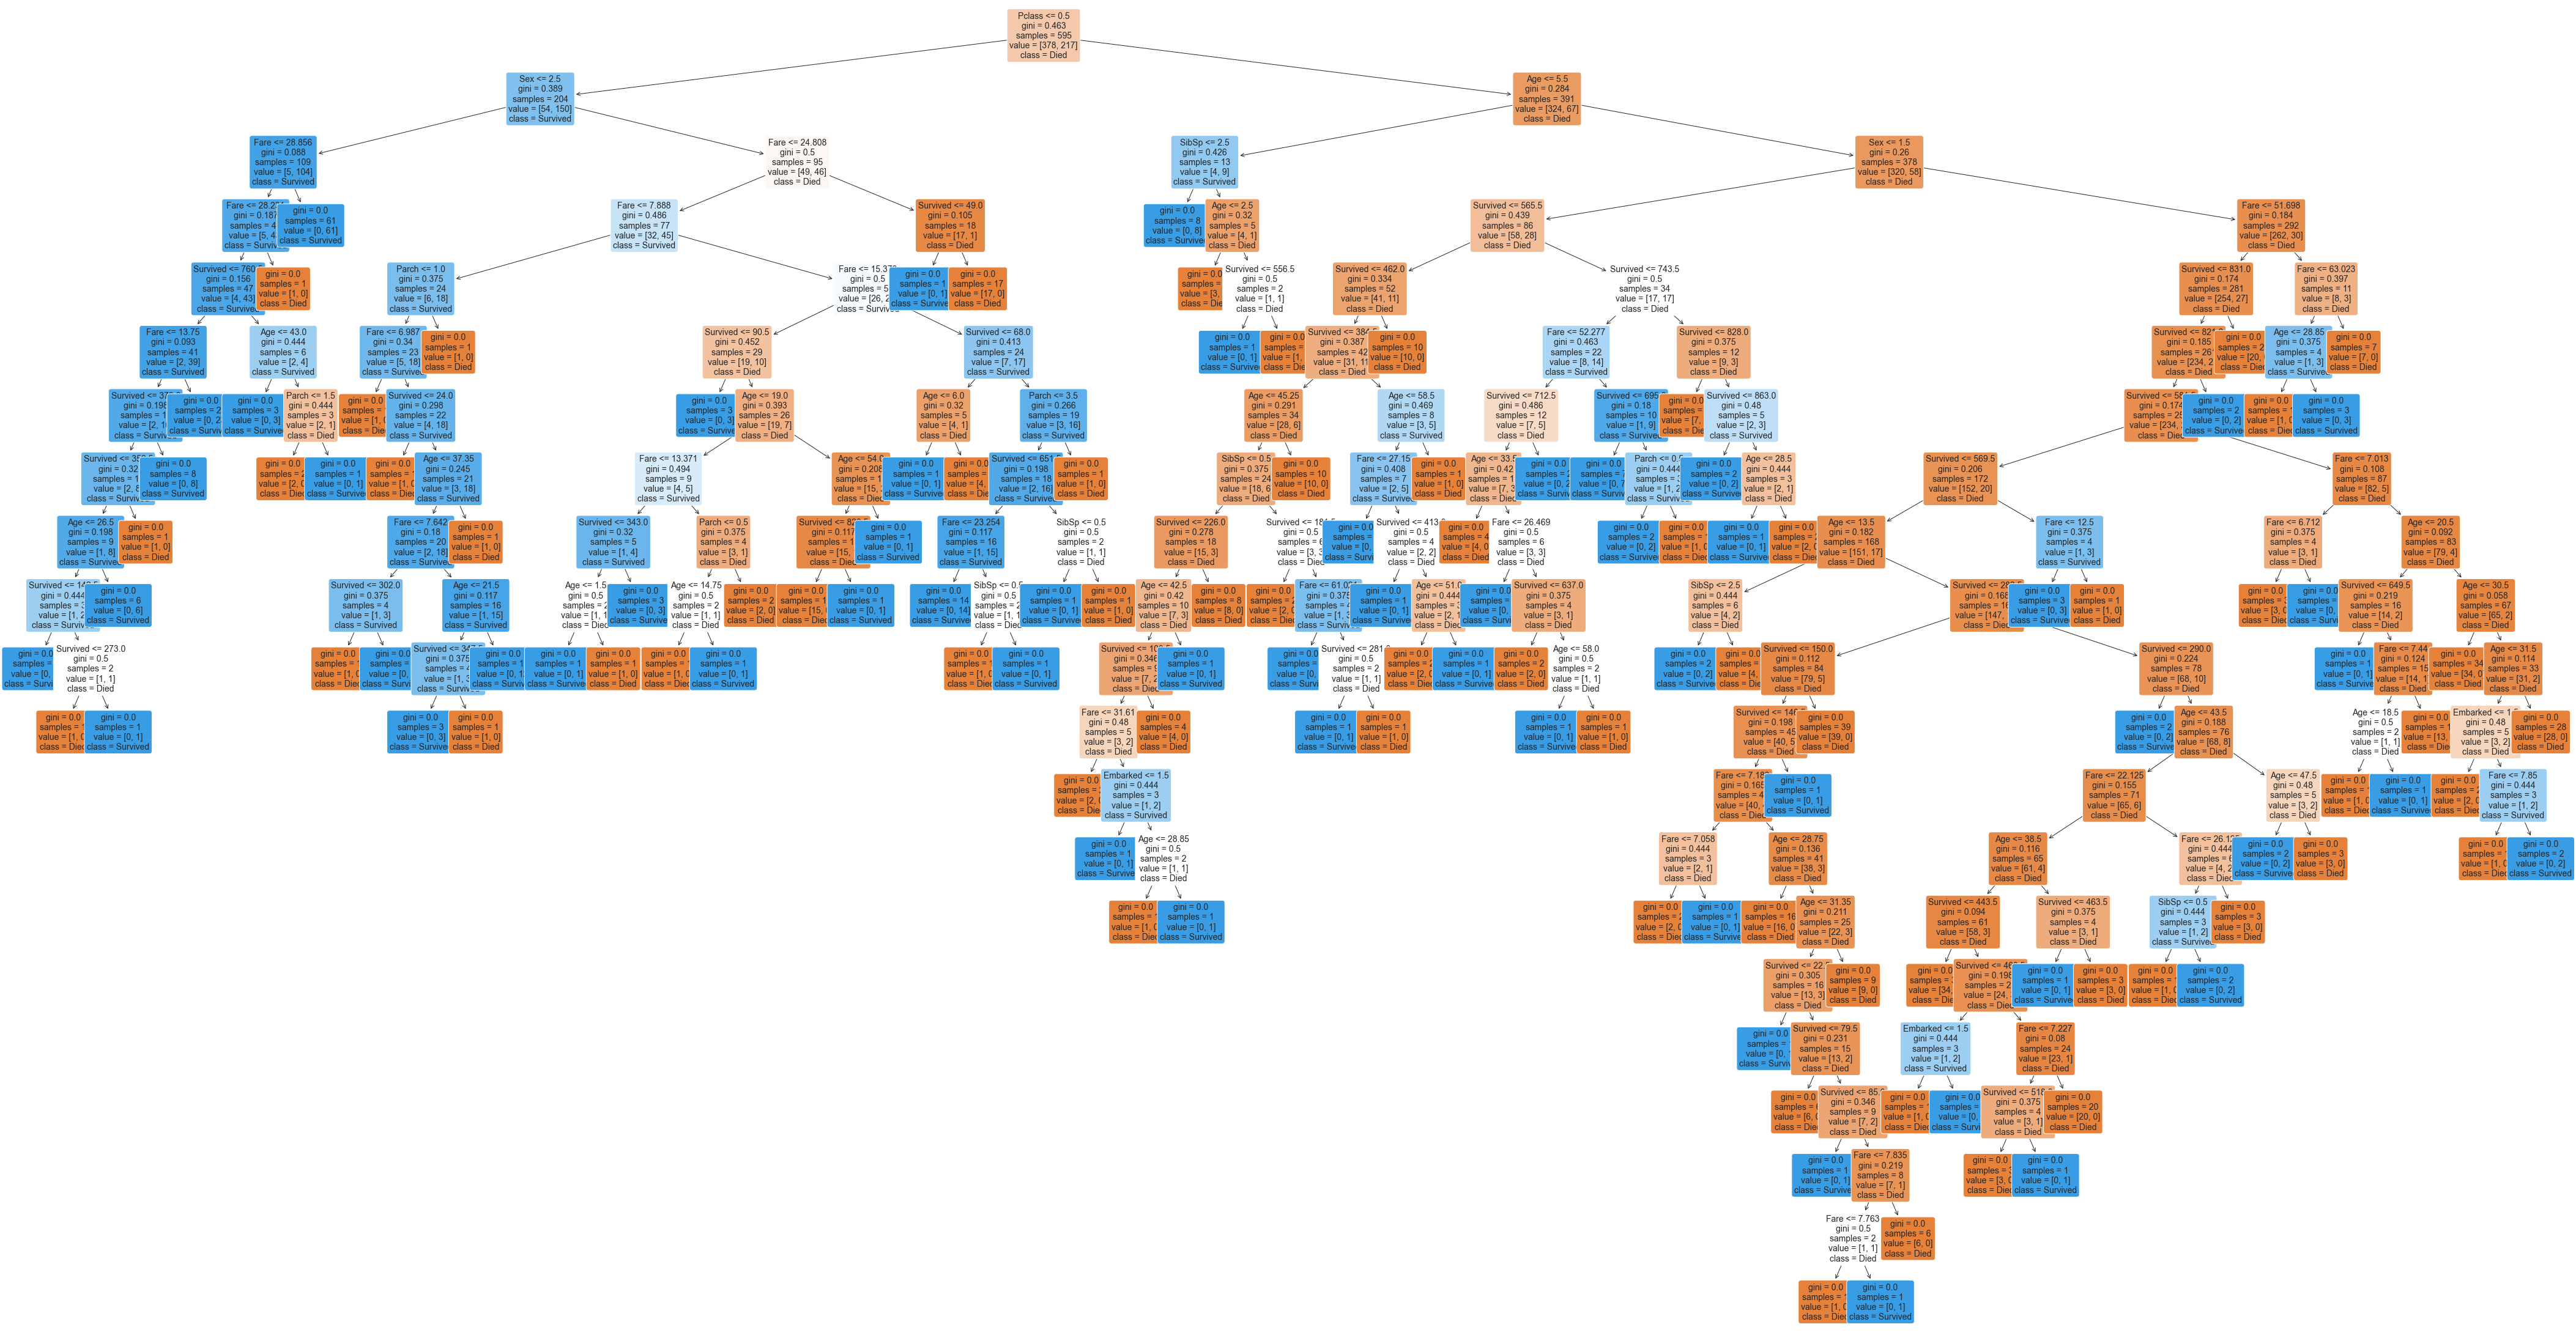

In [48]:
# Show chart of this initial decision tree
plt.figure(figsize=(75,40))
tree_1_image = plot_tree(decision_tree, 
              feature_names=df.iloc[:,1:].columns, 
              class_names={0:'Died',1:'Survived'},
              filled=True, 
              rounded=True, 
              fontsize=14)

In [49]:
# Define a list of max_depths, min_samples_leaves, and min_samples_splits
max_depths = list(range(1,41))
min_samples_leaves = list(range(1,41))

In [50]:
# Pass the parameters into GridSearchCV
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(),{'max_depth': max_depths, 'min_samples_leaf': min_samples_leaves}, cv = 5,scoring = 'roc_auc', n_jobs = -1)

In [51]:
# Use GridSearchCV to figure out the best possible parameters to pass
grid_decision_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='roc_auc')

In [52]:
# Fit the newly optimized decision tree
tree_2 = DecisionTreeClassifier(max_depth = grid_decision_tree.best_params_['max_depth'], min_samples_leaf = grid_decision_tree.best_params_['min_samples_leaf'])
tree_2 = tree_2.fit(x_train, y_train)

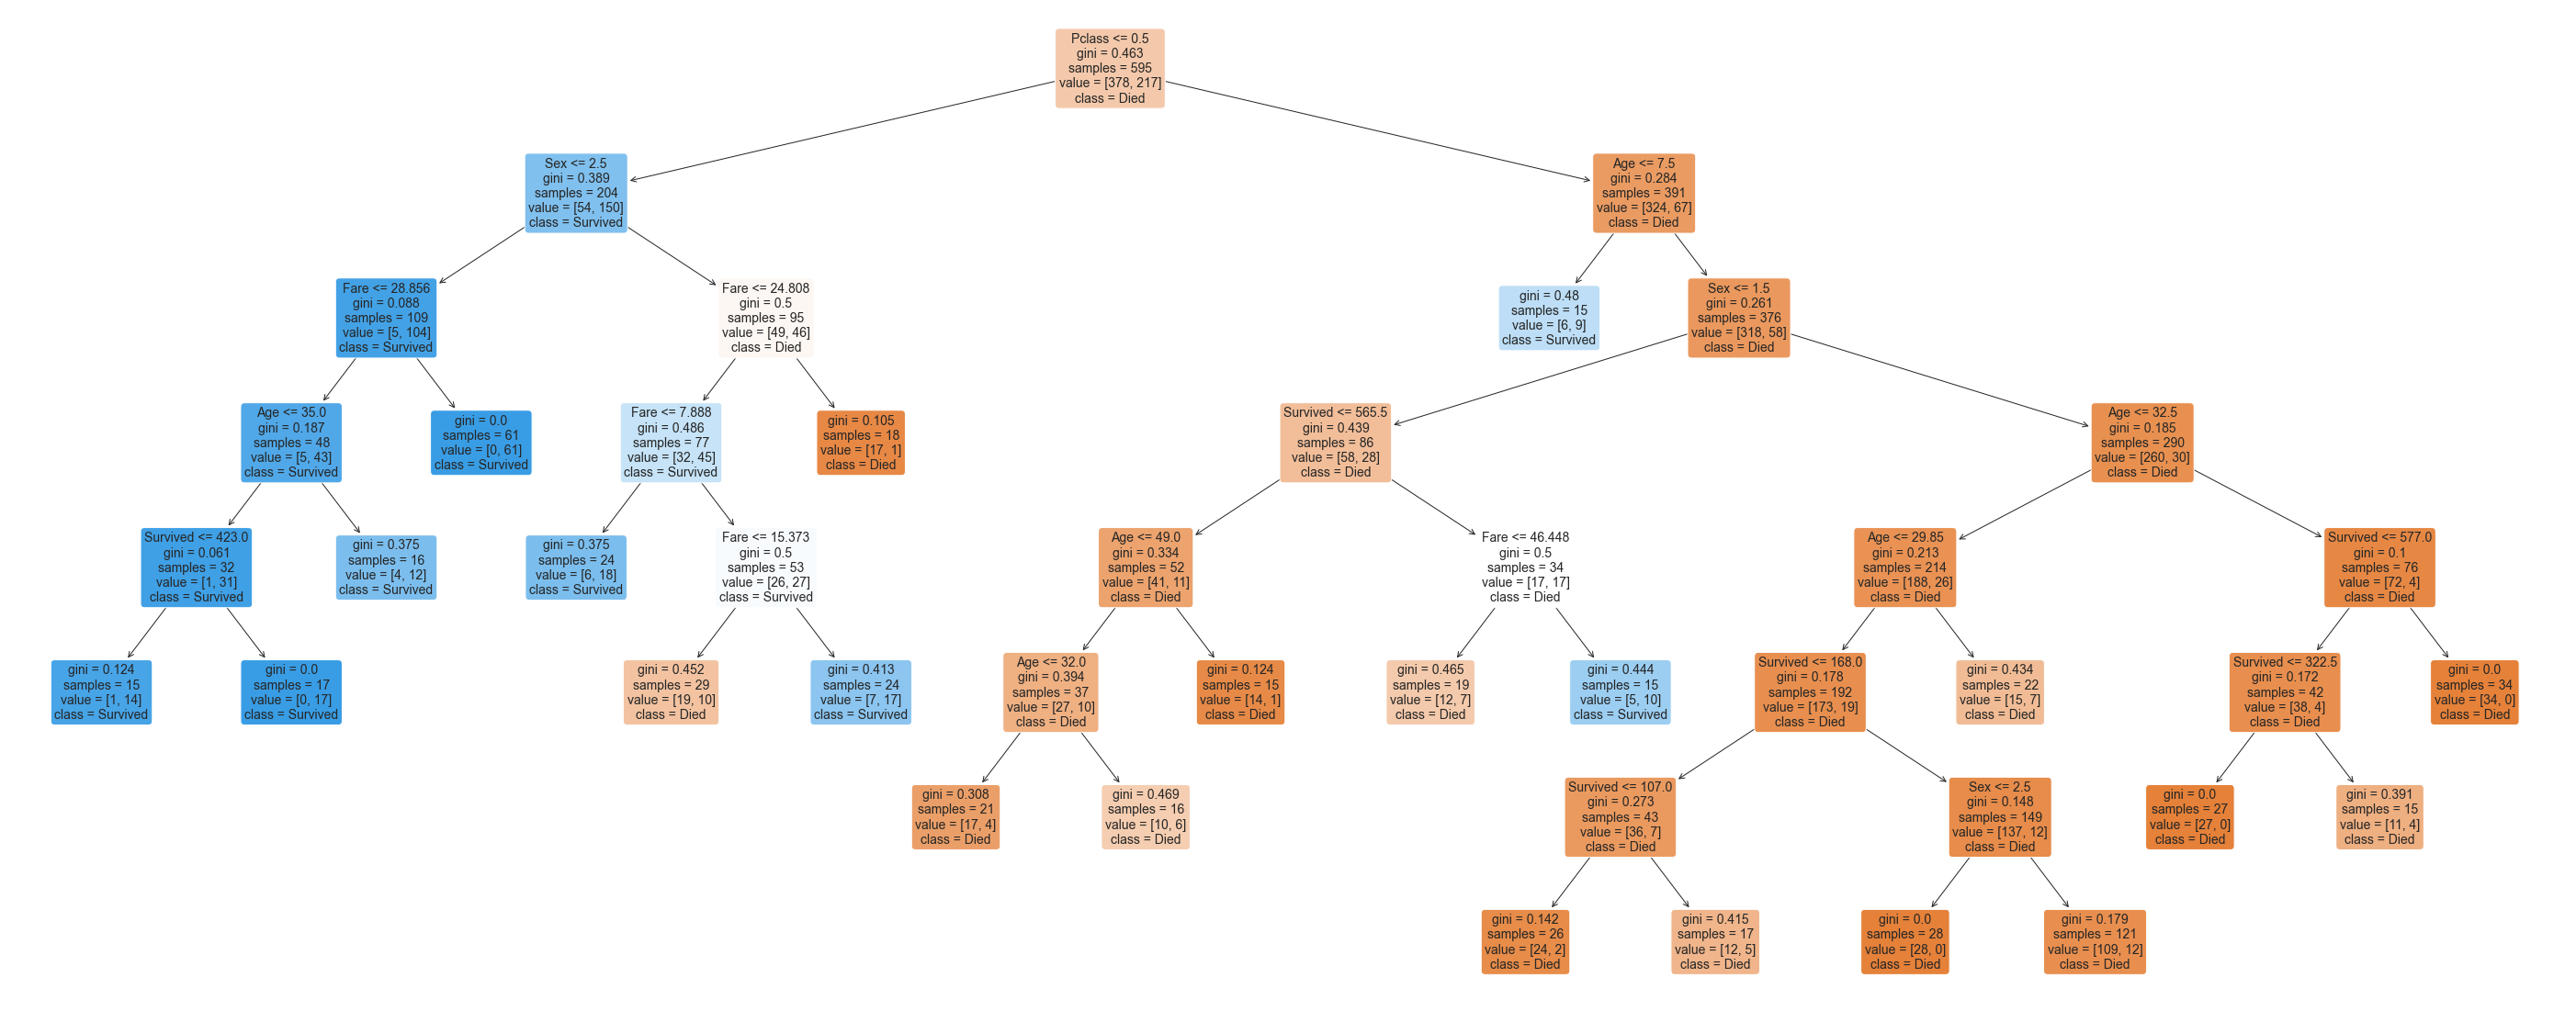

In [53]:
# Display the newly optimized decision tree
plt.figure(figsize=(50,20))
tree_2_image = plot_tree(tree_2, 
              feature_names=df.iloc[:,1:].columns, 
              class_names={0:'Died',1:'Survived'},
              filled=True, 
              rounded=True, 
              fontsize=14)

In [54]:
confusion_matrix(y_test,Y_pred)

array([[133,  38],
       [ 38,  85]], dtype=int64)

In [55]:
accuracy_score(y_test,Y_pred)

0.7414965986394558

In [56]:
from six import StringIO
from IPython.display import Image

In [57]:
dot_data=StringIO()

In [58]:
tree.export_graphviz(decision_tree, out_file=dot_data)

In [59]:
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

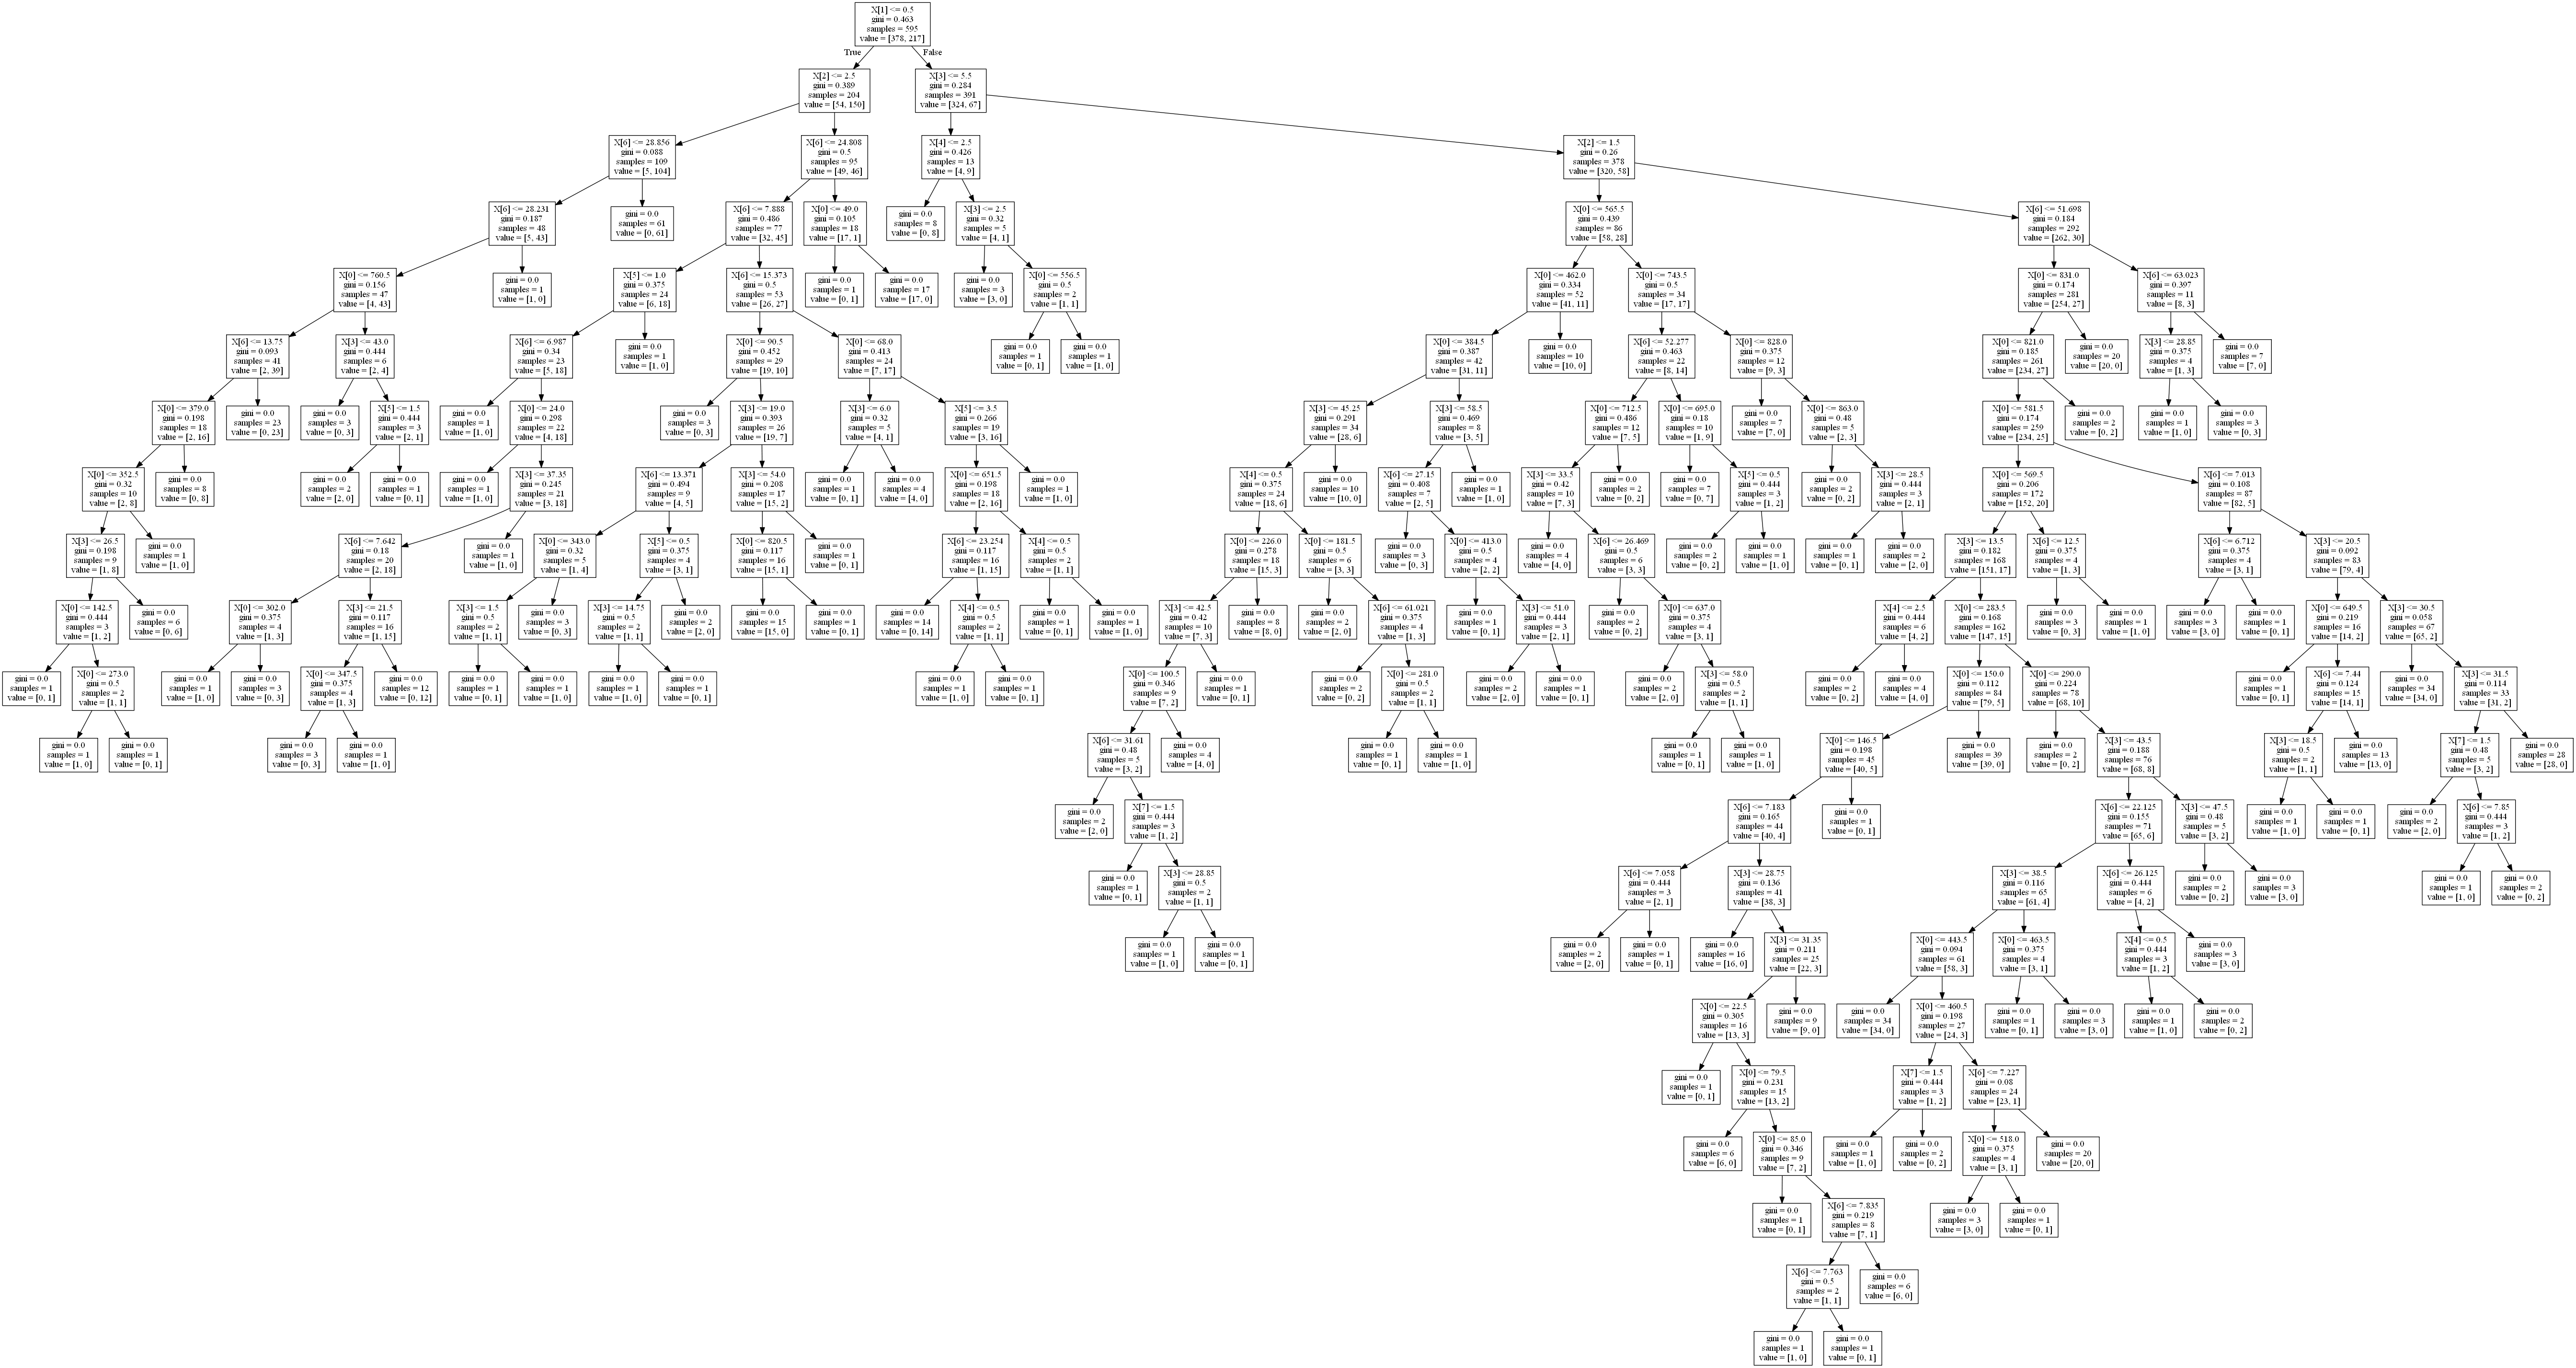

In [60]:
Image(graph.create_png())

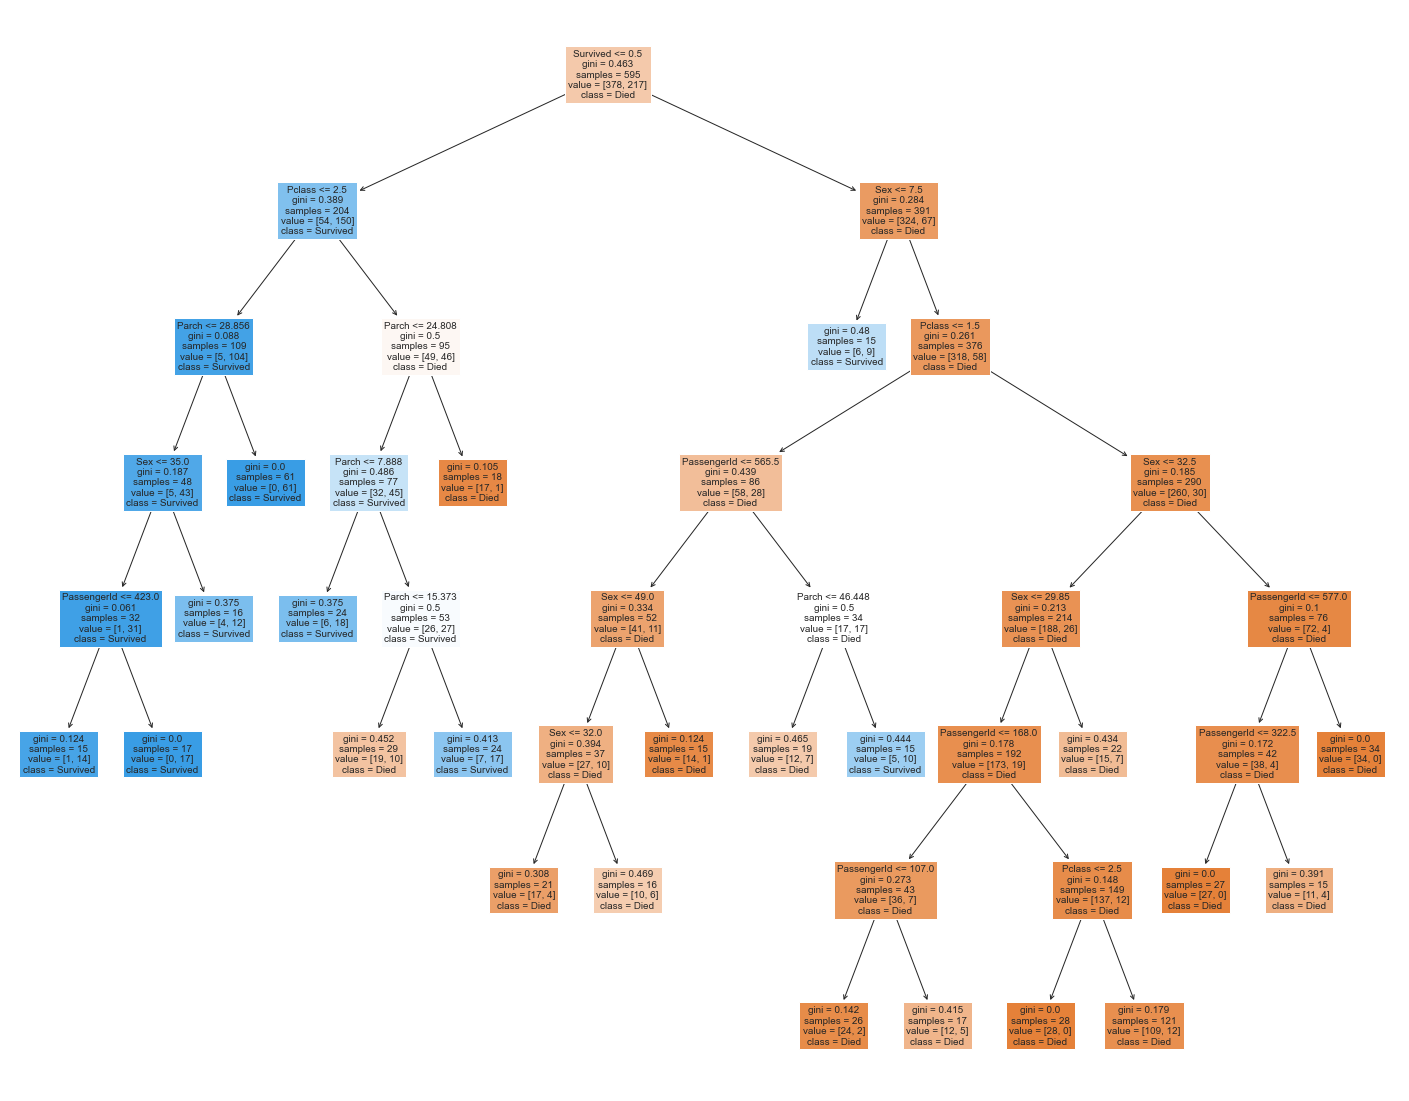

In [61]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_2, 
                   feature_names=df.columns,  
                   class_names={0:'Died',1:'Survived'},
                   filled=True)

In [62]:
fig.savefig("decistion_tree2.png")

In [63]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [64]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(x, y)

In [65]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_2 <= 2.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- value: [0.50]
|   |   |--- feature_3 >  2.50
|   |   |   |--- value: [0.95]
|   |--- feature_2 >  2.50
|   |   |--- feature_6 <= 23.35
|   |   |   |--- value: [0.59]
|   |   |--- feature_6 >  23.35
|   |   |   |--- value: [0.11]
|--- feature_1 >  0.50
|   |--- feature_3 <= 6.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- value: [1.00]
|   |   |--- feature_4 >  2.50
|   |   |   |--- value: [0.11]
|   |--- feature_3 >  6.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- value: [0.36]
|   |   |--- feature_2 >  1.50
|   |   |   |--- value: [0.12]



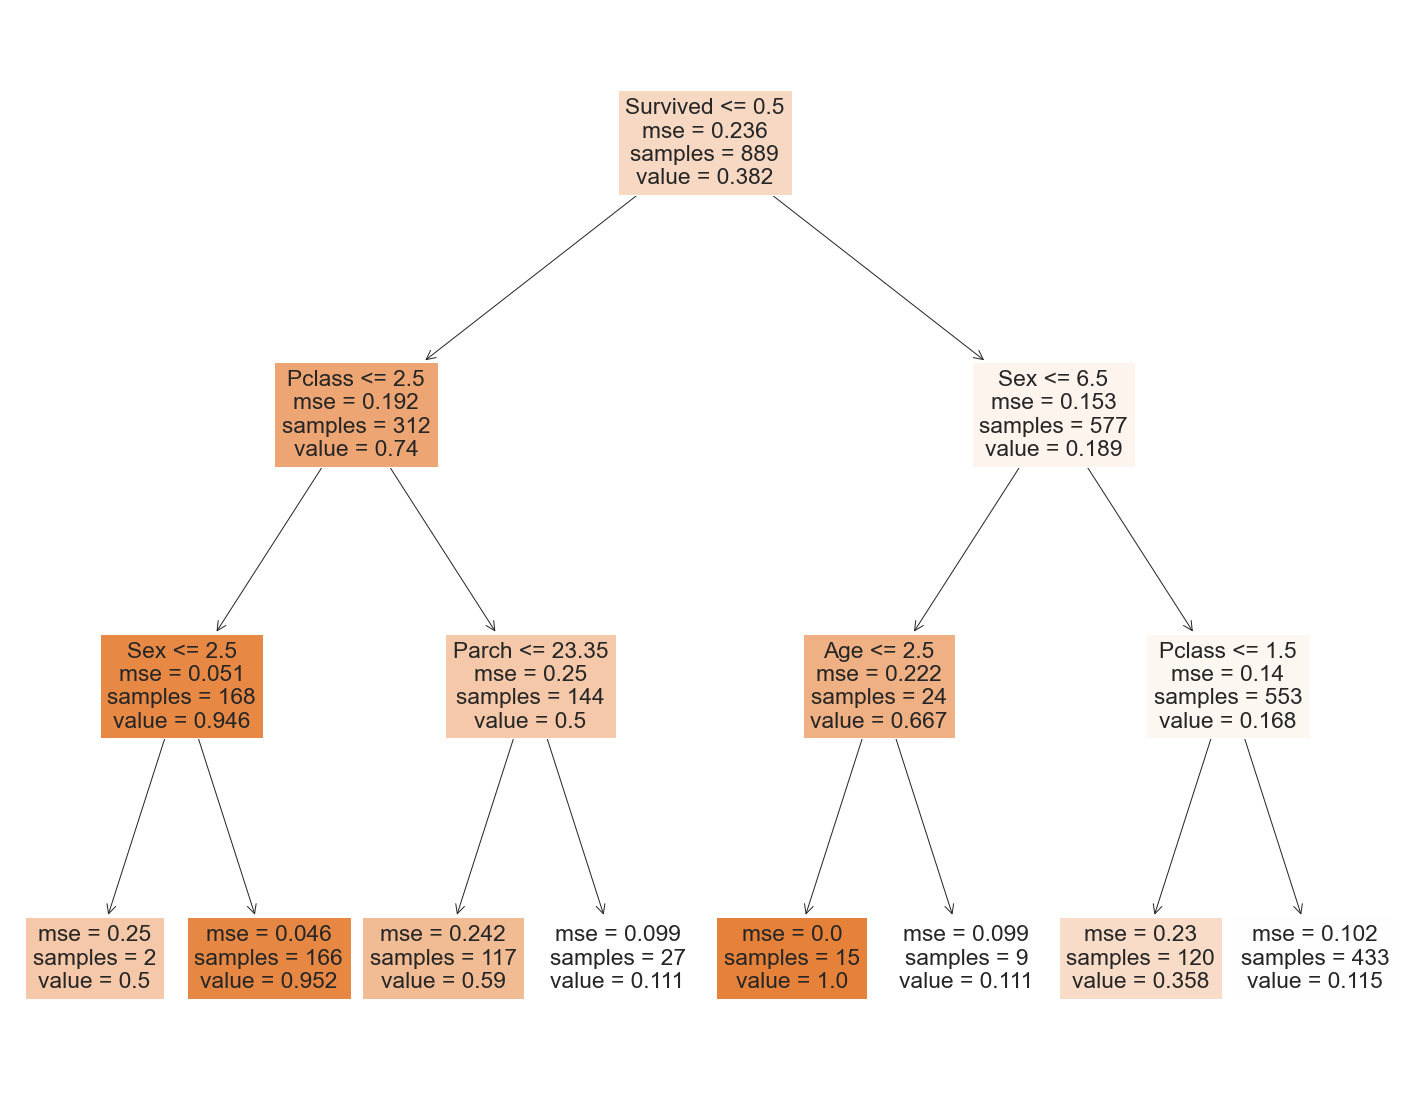

In [66]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=df.columns, filled=True)

In [67]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=df.columns, 
                                filled=True)
graphviz.Source(dot_data, format="png") 

ValueError: Length of feature_names, 10 does not match number of features, 8

# Random Forest

In [68]:
import os

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
 9   Alone        889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 76.4 KB


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [71]:
rdmf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rdmf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [72]:
# Making a list of accuracies
accuracies = []

In [73]:
rdmf_score = rdmf.score(x_test, y_test)
rdmf_score_tr = rdmf.score(x_train, y_train)
accuracies.append(rdmf_score)
print(rdmf_score)
print(rdmf_score_tr)

0.7925170068027211
0.9915966386554622


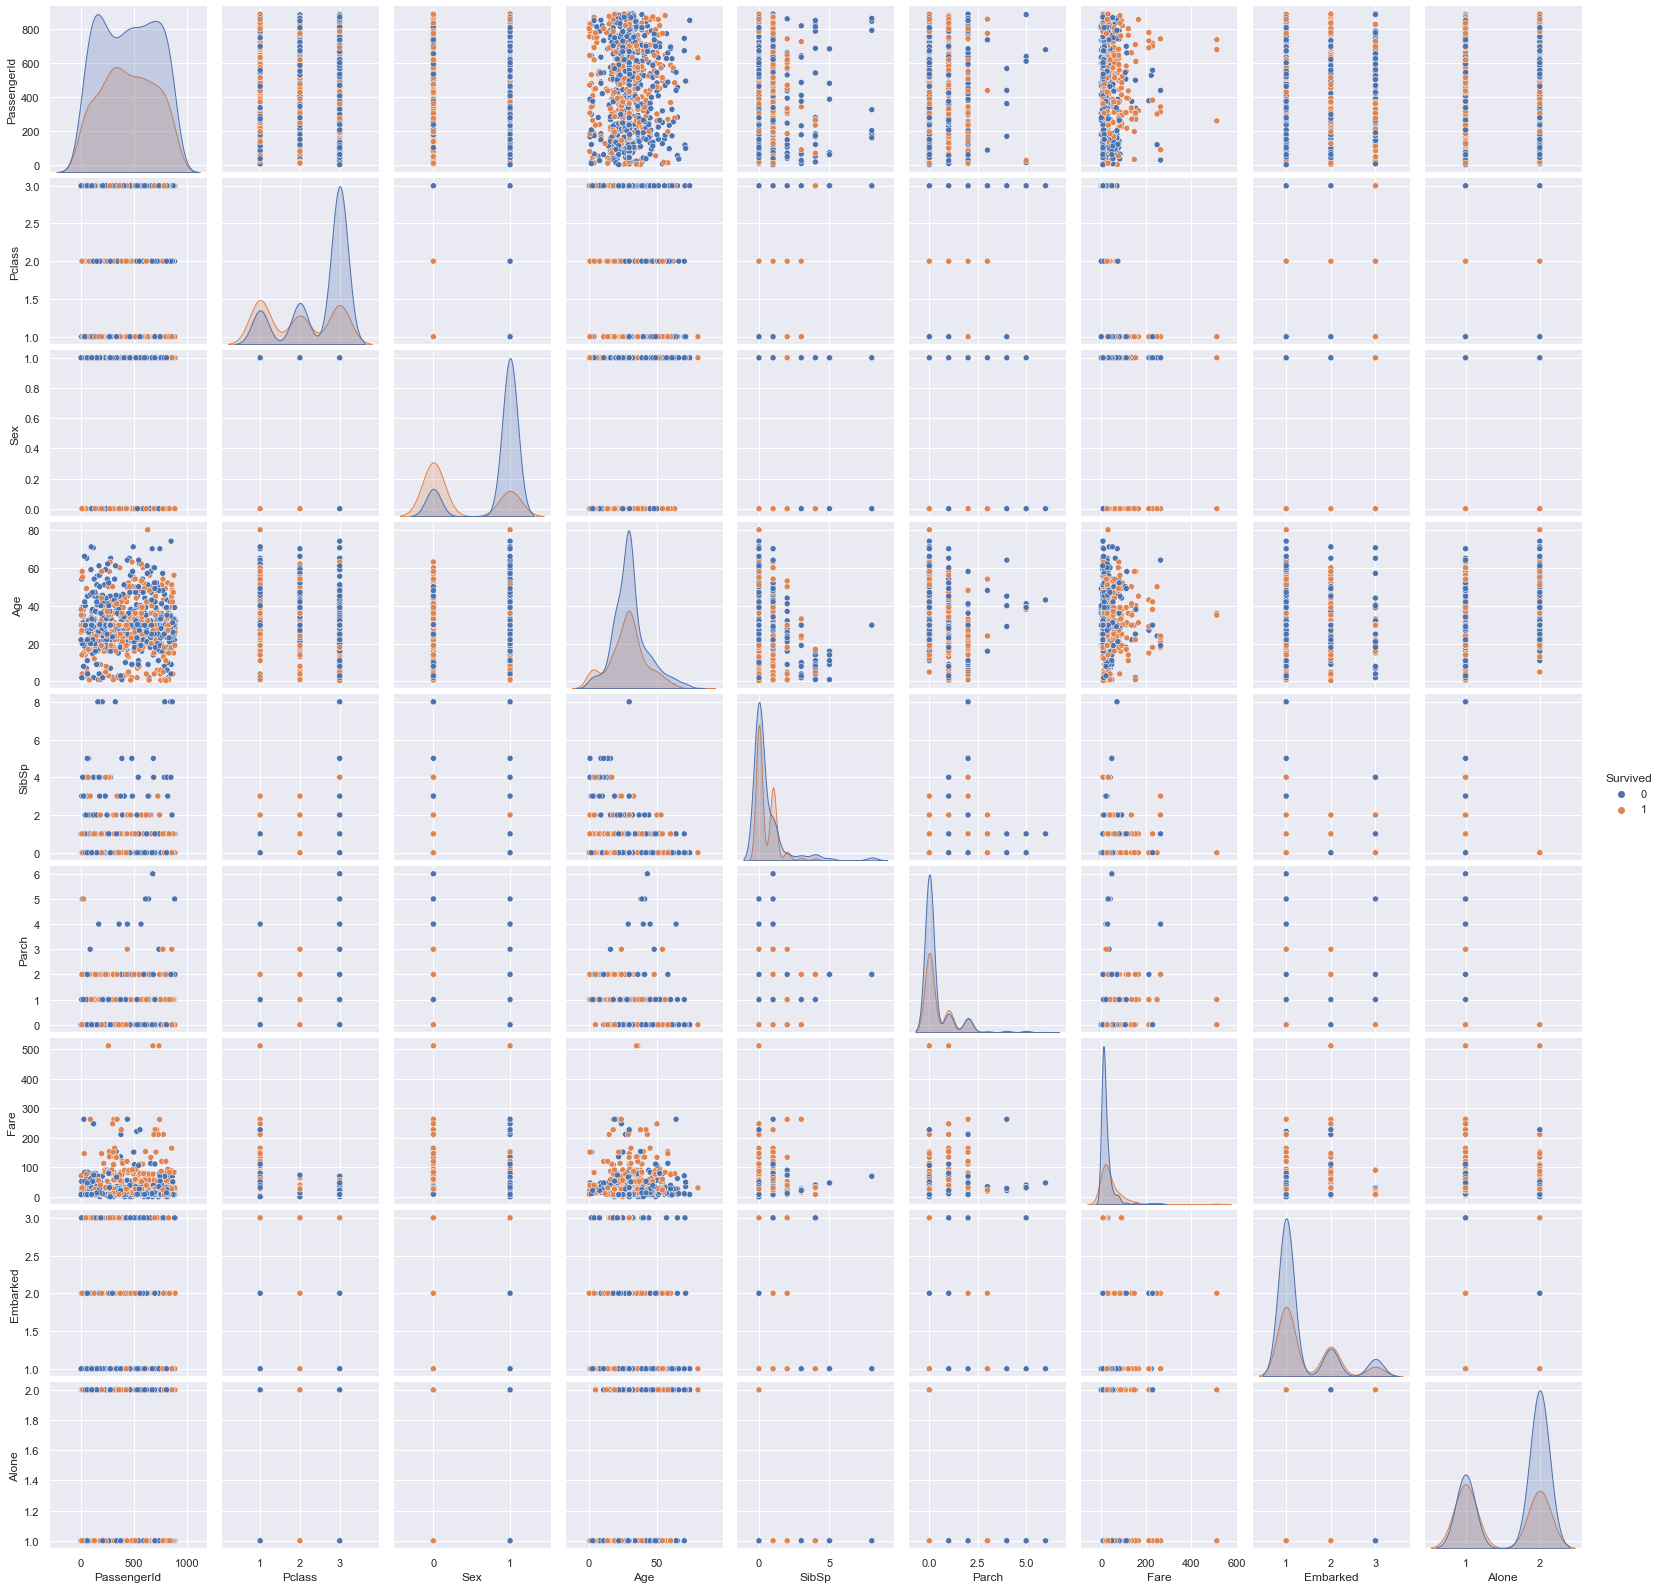

In [74]:
sns.pairplot(data=df, hue = 'Survived')

<AxesSubplot:>

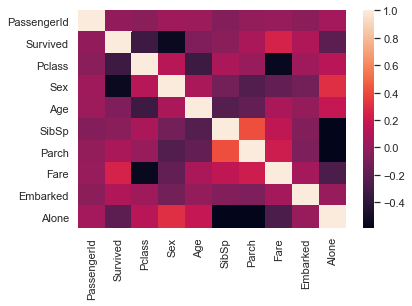

In [75]:
# correlation matrix
sns.heatmap(df.corr())

In [76]:
target = df['Survived']
df1 = df.copy()
df1 = df1.drop('Survived', axis =1)

In [77]:
X = df1

In [78]:
target

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 889, dtype: int64

In [79]:
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [80]:
y = target

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (711, 9)
Testing split input-  (178, 9)


In [82]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [83]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       106
           1       0.72      0.72      0.72        72

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



Text(0.5, 1.0, 'Accuracy Score: 0.7752808988764045')

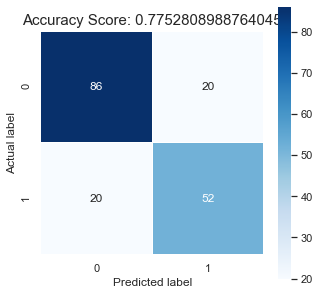

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [85]:
print(accuracy_score(y_test,y_pred))

0.7752808988764045


In [86]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


Predicted No  Predicted Yes
Actual No             86             20
Actual Yes            20             52

In [87]:
np.isnan(df.any()) #and gets False
np.isfinite(df.all()) #and gets True

PassengerId    True
Survived       True
Pclass         True
Sex            True
Age            True
SibSp          True
Parch          True
Fare           True
Embarked       True
Alone          True
dtype: bool

In [93]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


C:\Users\HanaA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
y_pred=lr.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

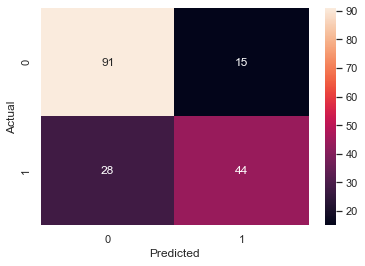

In [90]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [96]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [121]:
print(accuracy_score(y_test,y_pred))

0.7584269662921348


In [122]:
x_test

PassengerId  Sex  Pclass        Age  SibSp  Parch     Fare  Alone
280          671    0       2  40.000000      1      1  39.0000      1
436          267    1       3  16.000000      4      1  39.6875      1
39            44    0       2   3.000000      1      2  41.5792      1
419          734    1       2  23.000000      0      0  13.0000      2
586          422    1       3  21.000000      0      0   7.7333      2
..           ...  ...     ...        ...    ...    ...      ...    ...
712          599    1       3  29.699118      0      0   7.2250      2
840          247    0       3  25.000000      0      0   7.7750      2
380          761    1       3  29.699118      0      0  14.5000      2
140          441    0       2  45.000000      1      1  26.2500      1
173          736    1       3  28.500000      0      0  16.1000      2

[294 rows x 8 columns]

In [123]:
y_test

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [129]:
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = lr.predict_proba(X_test)

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_probabilities = lr.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# # auc scores
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)

0.8067348008385746


In [131]:

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

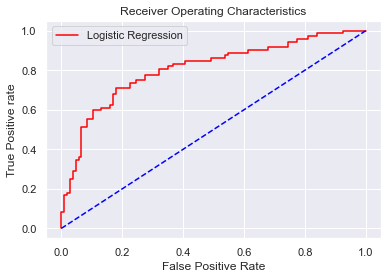

In [132]:
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('Receiver Operating Characteristics')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

In [133]:
#function which makes prediction on given model and return auc score
def prediction_auc(x, y_true):
    y_pred=decisiontree.predict(x)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
    result = auc(false_positive_rate, true_positive_rate)
    return result

#plotting results for train and test data depending on teste variable
def plotting(x, x_name, list_auc_train, list_auc_test):
    plt.plot(x, list_auc_train, label='train')    
    plt.plot(x, list_auc_test, label='test')
    plt.legend()
    plt.xlabel(x_name)
    plt.ylabel('AUC score')
    plt.show()

#function which return image of tree's structure
def visualizing_tree(tree, name):
    export_graphviz(tree, out_file='tree.dot',feature_names = x_train.columns.tolist(), class_names=['Not Survived', 'Survived'], rounded = True, proportion = False, precision = 2, filled = True)
    call(['dot', '-Tpng', 'tree.dot', '-o', name, '-Gdpi=600'])
    return Image(filename = name)

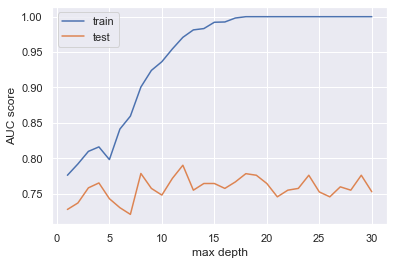

In [135]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

max_depths=range(1,31) #creating list of values to check

list_auc_train=[] #list to store results for train dataset 
list_auc_test=[] #list to store results for test dataset

#creating model and check result for each value of max depth
for max_depth in max_depths:
    decisiontree=DecisionTreeClassifier(max_depth=max_depth)
    decisiontree.fit(X_train,y_train)
    
    auc_train=prediction_auc(X_train,y_train)
    list_auc_train.append(auc_train)
    
    auc_test=prediction_auc(X_test,y_test)
    list_auc_test.append(auc_test)

#plotting results    
plotting(max_depths, 'max depth', list_auc_train, list_auc_test)